In [2]:
# Import necessary packages
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from tqdm import tqdm
from astropy.io import fits

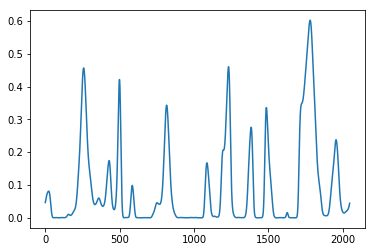

In [4]:
# Create path to the files
DATADIR = "/Users/quijeremy/desktop/senior_thesis/spectra_data/training_data_clean"

CATEGORIES = ["spectra_0.55HM12_zr9_z5.000_1D", "spectra_1.0HM12_zr9_z5.000_1D", "spectra_1.8HM12_zr9_z5.000_1D"]

for category in CATEGORIES:  # do 3 spectra
    path = os.path.join(DATADIR,category)  # create path to each spectra
    for img in os.listdir(path):  # iterate over each image per spectra
        img_array = fits.getdata(path + '/' + img)
        plt.plot(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [5]:

print(img_array)
print(img_array.shape)
print(len(img_array))

[0.04644137 0.04895108 0.05150694 ... 0.03943049 0.04166218 0.04400466]
(2048,)
2048


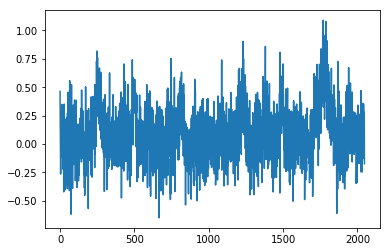

In [6]:
noise = np.random.normal(0, 0.2, len(img_array))
noisy = img_array + noise

plt.plot(noisy)
plt.show()

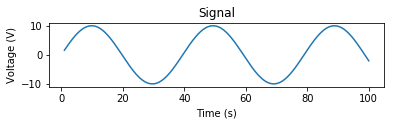

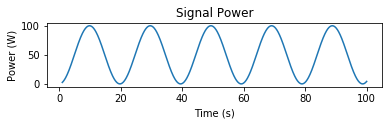

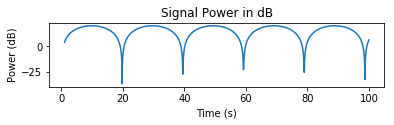

In [2]:
# Signal Generation
# matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(1, 100, 1000)
x_volts = 10*np.sin(t/(2*np.pi))
plt.subplot(3,1,1)
plt.plot(t, x_volts)
plt.title('Signal')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()

x_watts = x_volts ** 2
plt.subplot(3,1,2)
plt.plot(t, x_watts)
plt.title('Signal Power')
plt.ylabel('Power (W)')
plt.xlabel('Time (s)')
plt.show()

x_db = 10 * np.log10(x_watts)
plt.subplot(3,1,3)
plt.plot(t, x_db)
plt.title('Signal Power in dB')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()

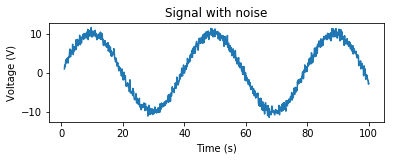

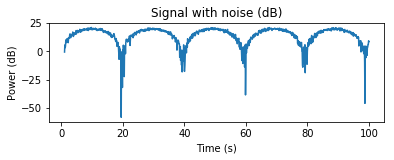

In [3]:
# Adding noise using target SNR

# Set a target SNR
target_snr_db = 20
# Calculate signal power and convert to dB 
sig_avg_watts = np.mean(x_watts)
sig_avg_db = 10 * np.log10(sig_avg_watts)
# Calculate noise according to [2] then convert to watts
noise_avg_db = sig_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
# Generate an sample of white noise
mean_noise = 0
noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(x_watts))
# Noise up the original signal
y_volts = x_volts + noise_volts

# Plot signal with noise
plt.subplot(2,1,1)
plt.plot(t, y_volts)
plt.title('Signal with noise')
plt.ylabel('Voltage (V)')
plt.xlabel('Time (s)')
plt.show()
# Plot in dB
y_watts = y_volts ** 2
y_db = 10 * np.log10(y_watts)
plt.subplot(2,1,2)
plt.plot(t, 10* np.log10(y_volts**2))
plt.title('Signal with noise (dB)')
plt.ylabel('Power (dB)')
plt.xlabel('Time (s)')
plt.show()
